# Example use case of the NC-SC

This notebook provides a simple use case of the Neural Continuous Synthetic Control (NC-SC) method for counterfactual estimation of time series, based on our paper *"Synthetic Controls in Continuous time"*.

## What is the neural continuous synthetic control method?

Counterfactual estimation using synthetic controls is one of the most successful recent methodological developments in causal inference. Despite its popularity, the current description only considers time series aligned across units and synthetic controls expressed as linear combinations of observed control units. 

NC-SC is a continuous-time alternative that models the latent counterfactual path explicitly using the formalism of controlled differential equations. This model is directly applicable to the general setting of irregularly-aligned multivariate time series and may be optimized in rich function spaces -- thereby substantially improving on some limitations of existing approaches.

#### We will illustrate the use of our method using Eurozone data.

The problem is to evaluate the effect of Eurozone membership on yearly current account deficits.

We will start by importing the necessary packages and plot the data for Spain.

In [1]:
import benchmarks
import algorithm
import data
import importlib
import matplotlib.pyplot as plt
import numpy as np

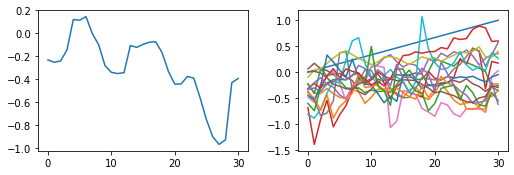

In [3]:
X, Y = data.get_emu_data(selected_country=4)

fig, axs = plt.subplots(1,2, figsize=(7, 2.3))
fig.tight_layout(pad=0.2, w_pad=2, h_pad=3)

# Spain trajectory
axs[0].plot(Y.squeeze())
# Control countries trajectory
axs[1].plot(X[0,:,:])
plt.show()

Let us define pre- and post-intervention data. 
The Euro was introduced in 1998 giving us 19 observations.

In [4]:
train_X, train_y = X[:,:19,:], Y[:,:19,:]
train_X.shape, train_y.shape

# for plots
test_X, test_y = data.get_emu_data(selected_country=4)

Let us now define the model and train. The intermediate plots during training show in the leftmost panel: the fit of the model and the observed data, in the middle panel: the estimated treatment effect, in the rightmost panel: the set of control trajectories.

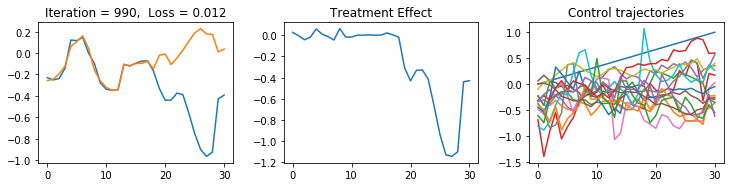

In [5]:
model = algorithm.NeuralCDE(input_channels=train_X.shape[2], hidden_channels=5)

# l1_reg = 0.01
iterations = 1000

algorithm.train(model,train_X, train_y, test_X, test_y, iterations)

As you can see, very quickly NC-SC converges to a very good solution approximating almost exactly the pre-teatment trajectory of Spain using data from other countries.

In contrast, we can compute the estimates of other methods, such as the original synthetic control approach by Abadie and his colleagues.

In [7]:
# import data in correct format
X_train_numpy , Y_train_numpy = data.get_emu_data_numpy()
X_train_numpy , Y_train_numpy = X_train_numpy[:19], Y_train_numpy[:19,np.newaxis]
X_test_numpy , Y_test_numpy = data.get_emu_data_numpy()

Mean squared error on the pre-treatment outcomes
0.03397669428409842


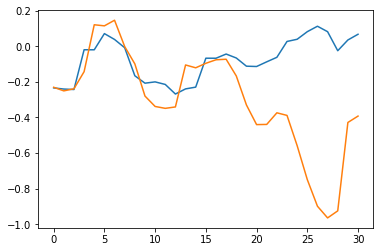

In [8]:
predictions_SC, w_SC = benchmarks.SC(X_train_numpy , Y_train_numpy, X_test_numpy)

print('Mean squared error on the pre-treatment outcomes')
print(np.mean((predictions_SC[:19]-Y_test_numpy[:19])**2))
plt.plot(predictions_SC)
plt.plot(Y_test_numpy)
plt.show()

The fit is worse due to some modelling limitations that we improve upon with NC-SC